In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
perfGPU_size = pd.read_csv("perfGPU_size.csv", sep=';', header=0, names=['size','nbIte','time','bandwith','prop','gflop'])
perfCPU_size = pd.read_csv("perfCPU_size.csv", sep=';', header=0, names=['size','nbIte','time','bandwith'])

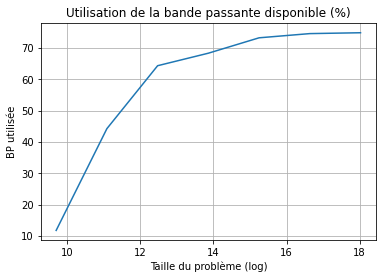

In [4]:
df = perfGPU_size
plt.title("Utilisation de la bande passante disponible (%)")
plt.xlabel(r'Taille du problème (log)')
plt.ylabel(r'BP utilisée')
plt.plot(np.log(df['size']), df['prop'])
# print(df['size'], df['time'])
plt.grid()

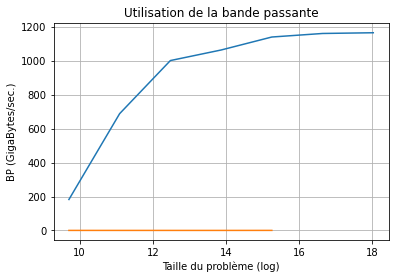

In [5]:
df = perfGPU_size
df2 = perfCPU_size

plt.title("Utilisation de la bande passante")
plt.xlabel(r'Taille du problème (log)')
plt.ylabel(r'BP (GigaBytes/sec.)')
plt.plot(np.log(df['size']), df['bandwith'])
plt.plot(np.log(df2['size']), df2['bandwith'])
plt.grid()

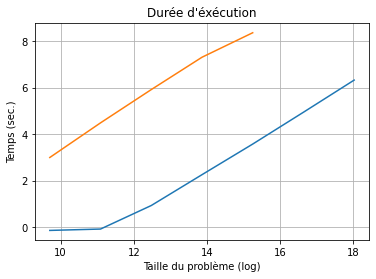

In [6]:
df = perfGPU_size
df2 = perfCPU_size

plt.title("Durée d'éxécution")
plt.xlabel(r'Taille du problème (log)')
plt.ylabel(r'Temps (sec.)')
plt.plot(np.log(df['size']), np.log(df['time']))
plt.plot(np.log(df2['size']), np.log(df2['time']))
plt.grid()